Part 1 - Import de todas as bibliotecas necessárias 

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Part 2 - Leitura do local dataframe + infos básicas

In [36]:
df = pd.read_csv('RTA Dataset.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [31]:
df.isnull().sum()   #verificar quantas colunas têm valores nulos

Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Lanes_or_Medians                385
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Cause_of_accident                 0
Accident_severity                 0
dtype: int64

In [38]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [6]:
no_veh = df['Number_of_vehicles_involved']
print(no_veh)

no_cas = df['Number_of_casualties']
print(no_cas)

0        2
1        2
2        2
3        2
4        2
        ..
12311    2
12312    2
12313    1
12314    2
12315    2
Name: Number_of_vehicles_involved, Length: 12316, dtype: int64
0        2
1        2
2        2
3        2
4        2
        ..
12311    1
12312    1
12313    1
12314    1
12315    1
Name: Number_of_casualties, Length: 12316, dtype: int64


### Part 3 - Analisar e eliminar colunas não importantes

In [ ]:
#.unique() -> ver todos os valores de uma coluna

type_of_vehicle = df['Type_of_vehicle'].unique()    #ELIMINAR COM CERTEZA -> irrelevante
print(type_of_vehicle, "\n\n")

owner_of_vehicle = df['Owner_of_vehicle'].unique()  #ELIMINAR COM CERTEZA -> irrelevante
print(owner_of_vehicle, "\n\n")

service_year_of_vehicle = df['Service_year_of_vehicle'].unique()    #ELIMINAR COM CERTEZA -> muitos nans
print(service_year_of_vehicle, "\n\n")

defect_of_vehicle = df['Defect_of_vehicle'].value_counts()  #tem 7777 "no defect"
print(defect_of_vehicle, "\n\n")    #ELIMINAR -> DADOS CONFUSOS

area_accident_occured = df['Area_accident_occured'].value_counts() #ELIMINAR -> IRRELEVANTE
print(area_accident_occured, "\n\n")

road_allignment = df['Road_allignment'].value_counts()  #ELIMINAR -> muitos dados iguais -> +80%  
print(road_allignment, "\n\n")

pedestrian_movement = df['Pedestrian_movement'].value_counts()  #ELIMINAR -> dados sem sentido
print(pedestrian_movement, "\n\n")

fitness_of_casuality = df['Fitness_of_casuality'].value_counts()  #ELIMINAR -> faltam dados e muitos iguais
print(fitness_of_casuality, "\n\n")

casualty_class = df['Casualty_class'].value_counts()  #ELIMINAR -> ver matriz de correlação
print(casualty_class, "\n\n")

ELiminar

In [39]:
colunas_a_eliminar = ['Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured',
                      'Road_allignment', 'Pedestrian_movement', 'Fitness_of_casuality', 'Casualty_class', 'Time', 'Day_of_week']

df.drop(colunas_a_eliminar, axis = 1, inplace = True)

In [40]:
df

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,NaN,No junction,Asphalt roads,Dry,Daylight,...,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,NaN,Moving Backward,Slight Injury
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,2,Going straight,na,na,na,NaN,Overtaking,Slight Injury
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Dry,Daylight,...,Collision with roadside objects,2,2,Going straight,Male,31-50,3,Driver,Changing lane to the left,Serious Injury
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,2,Going straight,Female,18-30,3,Driver,Changing lane to the right,Slight Injury
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,2,Going straight,na,na,na,NaN,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,NaN,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,1,Going straight,na,na,na,Driver,No distancing,Slight Injury
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,1,Other,na,na,na,Driver,No distancing,Slight Injury
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,1,1,Other,Male,31-50,3,Driver,Changing lane to the right,Serious Injury
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,1,Other,na,na,na,Driver,Driving under the influence of drugs,Slight Injury


Renomear

In [41]:
#time, day_of_week, age_band_of_driver, sex_of_driver, educational_level, vehicle_driver_relation, driving_experience
#type_of_vehicle, owner_of_vehicle, service_year_of_vehicle, defect_of_vehicle, area_accident_occured
#lanes_or_medians, road_allignment, types_of_junction, road_surface_type, road_surface_conditions, ligh_conditions
#weather_conditions, type_of_collision, number_of_vehicles_involved, number_of_casualties, vehicle_movement
#casualty_class, sex_of_casualty, age_band_of_casualty, casualty_severity, work_of_casualty, fitness_of_casualty
#pedestrian_movement, cause_of_accident, accident_severity, 
colunas_renomeadas = ['Faixa Etária', 'Género', 'Nível de Educação', 'Relação com o Veículo', 
                      'Experiência de Condução', 'Situação de Faixa', 'Tipo de Cruzamento',
                      'Tipo de Estrada', 'Condições do Piso', 'Condições de Visibilidade',
                      'Condiçoes Meteorológicas', 'Tipo de Colisão', 'N.º Veículos Envolvidos',
                      'Número de Vítimas', 'Movimento do Veículo', 'Género da Vítima',
                      'Faixa Etária da Vítima', 'Gravidade da Vítima', 'Ocupação da Vítima',
                      'Causa do Acidente', 'Gravidade do Acidente']

df.columns = colunas_renomeadas
df

,Faixa Etária,Género,Nível de Educação,Relação com o Veículo,Experiência de Condução,Situação de Faixa,Tipo de Cruzamento,Tipo de Estrada,Condições do Piso,Condições de Visibilidade,...,Tipo de Colisão,N.º Veículos Envolvidos,Número de Vítimas,Movimento do Veículo,Género da Vítima,Faixa Etária da Vítima,Gravidade da Vítima,Ocupação da Vítima,Causa do Acidente,Gravidade do Acidente
0,18-30,Male,Above high school,Employee,1-2yr,NaN,No junction,Asphalt roads,Dry,Daylight,...,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,NaN,Moving Backward,Slight Injury
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,2,Going straight,na,na,na,NaN,Overtaking,Slight Injury
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Dry,Daylight,...,Collision with roadside objects,2,2,Going straight,Male,31-50,3,Driver,Changing lane to the left,Serious Injury
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,2,Going straight,Female,18-30,3,Driver,Changing lane to the right,Slight Injury
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,2,Going straight,na,na,na,NaN,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,NaN,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,1,Going straight,na,na,na,Driver,No distancing,Slight Injury
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,1,Other,na,na,na,Driver,No distancing,Slight Injury
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,1,1,Other,Male,31-50,3,Driver,Changing lane to the right,Serious Injury
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,1,Other,na,na,na,Driver,Driving under the influence of drugs,Slight Injury


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create a heatmap using seaborn\n",
# Convert object-type columns to numeric using LabelEncoder\n",
label_encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column])
    
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Fazer matriz de correlação \n
Ver matriz de correlação da google
Perceber quantos NA existem para o target (Accident_severity)
Perceber se o número de Na que afeta é importante ou não

In [8]:
matrix = np.corrcoef(df['Number_of_vehicles_involved'], df['Number_of_casualties'])
matrix

array([[1.        , 0.21342682],
       [0.21342682, 1.        ]])

In [9]:
#value.counts diz o número de vezes que cada y aparece para cada x

teste = df.loc[:, ['Owner_of_vehicle', 'Service_year_of_vehicle']].value_counts()
print(teste)

Owner_of_vehicle  Service_year_of_vehicle
Owner             Unknown                    2606
                  2-5yrs                     1571
                  Above 10yr                 1179
                  5-10yrs                    1145
                  1-2yr                       655
Governmental      Unknown                     201
Owner             Below 1yr                   182
Governmental      2-5yrs                      115
                  Below 1yr                   100
                  1-2yr                        93
Organization      2-5yrs                       84
Governmental      Above 10yr                   83
                  5-10yrs                      73
Organization      Unknown                      66
                  5-10yrs                      62
                  Above 10yr                   51
                  1-2yr                        37
Other             1-2yr                        12
                  Unknown                      10
Name: co

Part 4 - Renomear nomes de colunas para melhorar elegibilidade

In [10]:
#time, day_of_week, age_band_of_driver, sex_of_driver, educational_level, vehicle_driver_relation, driving_experience
#type_of_vehicle, owner_of_vehicle, service_year_of_vehicle, defect_of_vehicle, area_accident_occured
#lanes_or_medians, road_allignment, types_of_junction, road_surface_type, road_surface_conditions, ligh_conditions
#weather_conditions, type_of_collision, number_of_vehicles_involved, number_of_casualties, vehicle_movement
#casualty_class, sex_of_casualty, age_band_of_casualty, casualty_severity, work_of_casualty, fitness_of_casualty
#pedestrian_movement, cause_of_accident, accident_severity, 
colunas_renomeadas = []

#df.columns = colunas_renomeadas
#df

In [11]:
#X
X = df.iloc[:, :-1].values # todas as colunas menos a target
#Y
Y =  df.iloc[:, -1].values # coluna target

print("Número de exemplos nos nossos dados: ", X.shape[0])

from sklearn.ensemble import ExtraTreesClassifier

#model = ExtraTreesClassifier()
#model.fit(X,Y)

#feat_importances = pd.Series(model.feature_importances_, index=df.columns[:-1])
#feat_importances.nlargest(8).plot(kind='barh')

#plt.show()


Número de exemplos nos nossos dados:  12316


Part 5 - Fazer matriz de correlação

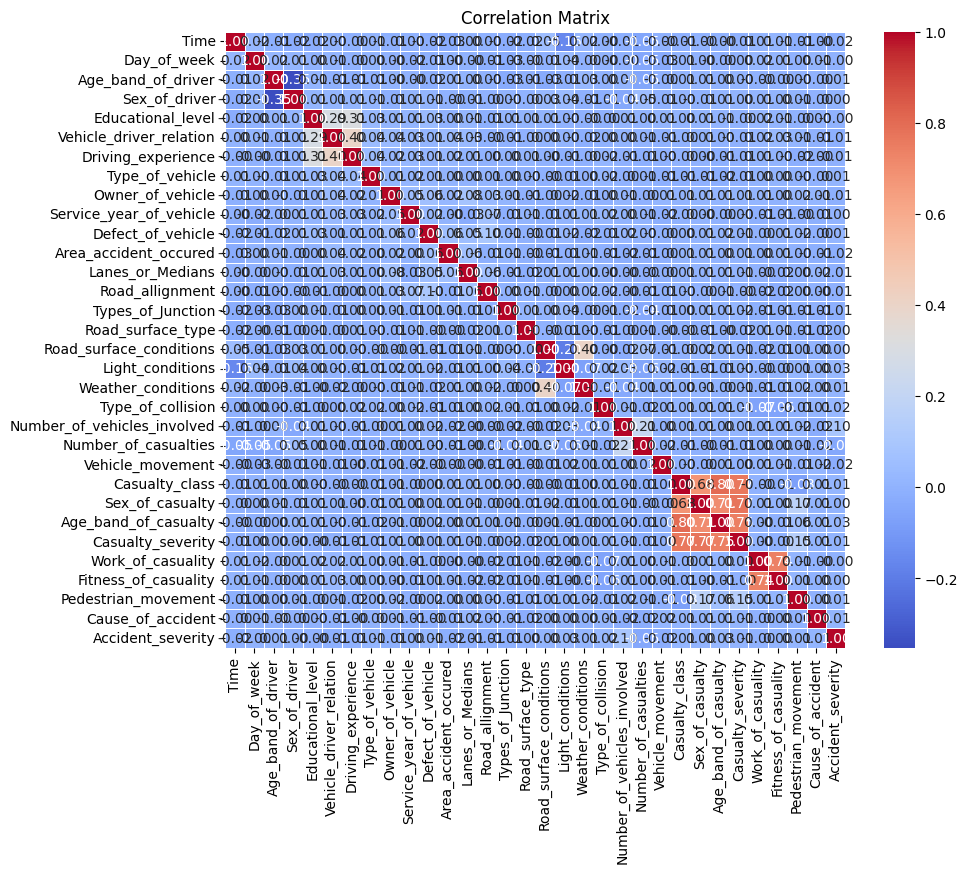

In [12]:
#sns.set(style="white")
from sklearn.preprocessing import LabelEncoder
# Create a heatmap using seaborn
# Convert object-type columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column])
    
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()